In [1]:
%matplotlib inline

In [2]:
import pandas as pd

### Cargar los conjuntos de datos

+ Cargar los datos de expresión genética $X$

In [3]:
X = pd.read_csv("matrix-MT_AfterPCA.csv", index_col=0)# rows represent genes and columns represent conditions

In [4]:
X

GSM3229893  GSM3229894  GSM3229895  GSM3229902  GSM3229903  \
Rv0001     8.448168    9.242174    8.609518    8.625042    8.375306   
Rv0002     7.018332    7.054956    7.251413    8.213414    7.968146   
Rv0003     6.082074    5.929181    6.144444    7.059091    6.940454   
Rv0004     6.746972    6.559071    6.601368    6.644559    6.685341   
Rv0005     9.526414    9.585069    9.545845    9.617032    9.539455   
...             ...         ...         ...         ...         ...   
Rv3920c    9.201877    9.113229    9.217973    9.588975    9.483261   
Rv3921c    8.863880    8.819495    8.806313    9.096335    9.069775   
Rv3922c    7.823838    8.080698    7.957810    9.124733    9.060108   
Rv3923c    8.342030    8.338711    8.054515    9.244347    9.243752   
Rv3924c    9.118993    9.046602    9.169189    9.882861    9.895304   

         GSM3229904  GSM3229911  GSM3229912  GSM3229913  GSM3230596  ...  \
Rv0001     8.752522    7.626334    6.853028    7.862423    8.546453  ...   
Rv0002     8.428257    7.606290    7.097382    7.793604    7.736873  ...   
Rv0003     6.893028    6.969696    6.785776    7.002397    6.781722  ...   
Rv0004     6.695078    6.707459    6.752608    6.598237    6.619904  ...   
Rv0005     9.713459    9.518295    9.453454    9.638239    9.531064  ...   
...             ...         ...         ...         ...         ...  ...   
Rv3920c    9.471906    9.521844    9.536765    9.567611    9.351985  ...   
Rv3921c    9.246554    9.025374    8.857350    9.037243    9.043492  ...   
Rv3922c    9.098963    9.052423    8.702506    9.193044    8.891107  ...   
Rv3923c    9.191991    9.362779    9.278254    9.494448    8.886913  ...   
Rv3924c    9.874061    9.719589    9.603496    9.786960    9.608540  ...   

         GSM5240577  GSM5240578  GSM5240579  GSM5240580  GSM5240581  \
Rv0001     8.431187    8.306105    8.509488    8.115309    8.325802   
Rv0002     6.750955    6.615496    8.542632    8.037298    6.955923   
Rv0003     7.097831    6.993568    6.820347    6.300313    6.910365   
Rv0004     7.311299    7.396090    6.589303    6.405759    7.088443   
Rv0005    10.185668   10.177200    9.245739    9.186731    9.864429   
...             ...         ...         ...         ...         ...   
Rv3920c    9.787143    9.863443    9.356304    9.230724    9.992385   
Rv3921c    9.542352    9.459349    8.999434    8.365514    9.604645   
Rv3922c    8.918225    8.947539    8.936875    8.495814    9.053860   
Rv3923c    8.866704    8.870424    9.217022    9.008319    9.028536   
Rv3924c    8.743041    8.747080   10.720273   10.074884    9.176250   

         GSM5240582  GSM5534454  GSM5534455  GSM5534456  GSM5534458  
Rv0001     8.308285    7.989610    8.573183    7.825769    8.875338  
Rv0002     6.886517    7.361270    7.990926    7.597836    7.466569  
Rv0003     7.067820    6.247096    7.116217    6.394426    6.840591  
Rv0004     7.391262    6.881990    6.744146    6.262666    6.839968  
Rv0005     9.947940    9.511073    9.648273    9.565235    9.570709  
...             ...         ...         ...         ...         ...  
Rv3920c   10.009382    9.427258    9.373972    9.335661    9.621782  
Rv3921c    9.749862    8.785464    9.050395    8.605942    9.338988  
Rv3922c    9.013692    8.617725    8.848893    8.213344    8.787340  
Rv3923c    8.966080    8.826904    8.903001    8.678966    9.176831  
Rv3924c    8.905936    9.343316    9.648885    9.306546    9.622392  

[4034 rows x 455 columns]

+ Cargar los factores de transcripción

In [5]:
tf = pd.read_csv("TF_M_tuberculosis_H37Rv.csv",header=None)[0]

In [6]:
tf

0       Rv0001
1      Rv0022c
2       Rv0023
3      Rv0042c
4      Rv0043c
        ...   
245    Rv2175c
246     Rv2669
247     Rv0485
248    Rv0891c
249    Rv1357c
Name: 0, Length: 250, dtype: object

# Inferir la GRN
+ Cargar la función 'score_links' y el método 'BayesianRidgeScore'

In [7]:
from grenadine.Inference.inference import score_links
from grenadine.Inference.regression_predictors import BayesianRidgeScore

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Inference/inference.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
2024-03-05 09:37:44.922604: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 09:37:44.951936: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-05 09:37:45.491879: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-05 09:37:45.965121: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1

sklearn.linear_model.RandomizedLasso could not be loaded
RandomizedLasso is not available in sklearn 1.2.0


+ Calificar todas las aristas posibles entre los factores de transcripción y los genes objetivo

In [8]:
score_matrix = score_links(X, BayesianRidgeScore, tf)

In [9]:
score_matrix

Rv0003   Rv0022c    Rv0023   Rv0042c   Rv0043c   Rv0047c    Rv0054  \
Rv0001   0.014106  0.027124  0.028244  0.196481  0.019971  0.065353  0.067544   
Rv0002   0.155389  0.009991  0.017572  0.092459  0.044612  0.026561  0.029818   
Rv0003        NaN  0.014981  0.002823  0.028055  0.058511  0.045588  0.046383   
Rv0004   0.130343  0.014431  0.084846  0.058846  0.043066  0.046847  0.014006   
Rv0005   0.057658  0.002510  0.049778  0.041016  0.003445  0.032883  0.017762   
...           ...       ...       ...       ...       ...       ...       ...   
Rv3920c  0.149218  0.014464  0.159886  0.000250  0.065266  0.042986  0.015369   
Rv3921c  0.159614  0.035649  0.124743  0.044510  0.072142  0.002999  0.002072   
Rv3922c  0.385445  0.055697  0.027398  0.079117  0.048420  0.045841  0.030371   
Rv3923c  0.255485  0.004017  0.028930  0.057738  0.063745  0.063131  0.052985   
Rv3924c  0.098463  0.005111  0.019153  0.009239  0.021126  0.001256  0.051432   

          Rv0067c    Rv0078    Rv0081  ...    Rv3736    Rv3744   Rv3765c  \
Rv0001   0.039437  0.032706  0.007423  ...  0.042033  0.002819  0.002745   
Rv0002   0.020551  0.028648  0.021061  ...  0.013474  0.037572  0.032219   
Rv0003   0.088038  0.064249  0.000409  ...  0.043745  0.019004  0.030526   
Rv0004   0.023861  0.081446  0.037032  ...  0.038064  0.026362  0.015637   
Rv0005   0.009178  0.028972  0.014466  ...  0.027382  0.043223  0.003717   
...           ...       ...       ...  ...       ...       ...       ...   
Rv3920c  0.032548  0.014654  0.055859  ...  0.085081  0.097931  0.102701   
Rv3921c  0.036224  0.009260  0.038067  ...  0.040089  0.110245  0.034301   
Rv3922c  0.042468  0.073303  0.017451  ...  0.143235  0.247564  0.081148   
Rv3923c  0.008187  0.051023  0.037943  ...  0.035805  0.218149  0.052828   
Rv3924c  0.002461  0.054637  0.008192  ...  0.043706  0.117545  0.095811   

          Rv3830c    Rv3833    Rv3849    Rv3855   Rv3862c    Rv3863    Rv0001  
Rv0001   0.017362  0.050891  0.086919  0.020943  0.009972  0.022180       NaN  
Rv0002   0.018169  0.043940  0.057132  0.010406  0.009523  0.071264  0.123131  
Rv0003   0.034994  0.019133  0.043907  0.009386  0.015554  0.025735  0.013849  
Rv0004   0.008029  0.043047  0.038809  0.010323  0.041325  0.099853  0.004275  
Rv0005   0.044752  0.049191  0.069591  0.035079  0.014527  0.004218  0.033566  
...           ...       ...       ...       ...       ...       ...       ...  
Rv3920c  0.002250  0.007142  0.091662  0.023725  0.038197  0.109719  0.113370  
Rv3921c  0.034830  0.023597  0.141258  0.010694  0.018899  0.030476  0.199639  
Rv3922c  0.029301  0.081682  0.103328  0.014481  0.003663  0.081318  0.049233  
Rv3923c  0.067974  0.101769  0.089011  0.040849  0.003218  0.089745  0.016568  
Rv3924c  0.025116  0.029104  0.102952  0.048190  0.028053  0.043581  0.090834  

[4034 rows x 249 columns]

In [10]:
score_matrix.to_csv("GRENADINE-Bayesian_Ridge-MT.csv", sep = "\t", header = True)

# Visualizar los resultados

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

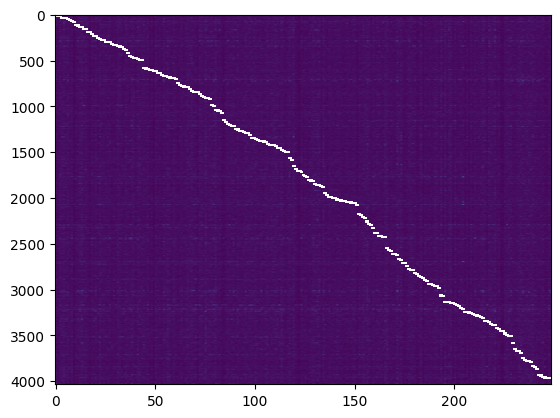

In [12]:
plt.imshow(score_matrix,aspect="auto")

# Clasificar las interacciones de acuerdo a sus puntuaciones

In [13]:
from grenadine.Inference.inference import rank_GRN
ranking = rank_GRN(score_matrix)

In [14]:
ranking.head(20)

rank     score       TF       TG
Rv3066_Rv3065     1.0  1.088552   Rv3066   Rv3065
Rv3133c_Rv3130c   2.0  0.997443  Rv3133c  Rv3130c
Rv1129c_Rv1130    3.0  0.983257  Rv1129c   Rv1130
Rv3133c_Rv2031c   4.0  0.945211  Rv3133c  Rv2031c
Rv3133c_Rv2030c   5.0  0.937315  Rv3133c  Rv2030c
Rv3133c_Rv1738    6.0  0.923457  Rv3133c   Rv1738
Rv2989_Rv2988c    7.0  0.912890   Rv2989  Rv2988c
Rv3160c_Rv3161c   8.0  0.899106  Rv3160c  Rv3161c
Rv0353_Rv0351     9.0  0.897583   Rv0353   Rv0351
Rv2989_Rv2987c   10.0  0.838746   Rv2989  Rv2987c
Rv3855_Rv3854c   11.0  0.831119   Rv3855  Rv3854c
Rv3133c_Rv3131   12.0  0.828607  Rv3133c   Rv3131
Rv3249c_Rv3250c  13.0  0.816682  Rv3249c  Rv3250c
Rv3133c_Rv2626c  14.0  0.812132  Rv3133c  Rv2626c
Rv3133c_Rv2007c  15.0  0.779278  Rv3133c  Rv2007c
Rv0353_Rv0440    16.0  0.777963   Rv0353   Rv0440
Rv0232_Rv0233    17.0  0.738446   Rv0232   Rv0233
Rv3133c_Rv3127   18.0  0.736821  Rv3133c   Rv3127
Rv0672_Rv0341    19.0  0.730464   Rv0672   Rv0341
Rv0981_Rv2031c   20.0  0.725128   Rv0981  Rv2031c

# Evaluar los resultados
+ Cargar los Gold Standard

In [15]:
grn = pd.read_csv("GS_MT-FINAL.csv",header=0)

In [16]:
grn

TF       TG  Unos
0        Rv0001   Rv0001     1
1        Rv0117   Rv0001     0
2        Rv0144   Rv0001     0
3       Rv0212c   Rv0001     0
4        Rv0302   Rv0001     0
...         ...      ...   ...
132629   Rv0576  Rv1999c     0
132630   Rv1379  Rv1999c     0
132631  Rv3082c  Rv1999c     0
132632  Rv1963c  Rv1999c     0
132633  Rv1846c  Rv1999c     0

[132634 rows x 3 columns]

In [17]:
# Rename the columns and the index
grn.columns = ["TF","TG","IS_REGULATED"]
grn.index = grn["TF"]+"_"+grn["TG"]
# Drop duplicate rows
grn = grn.drop_duplicates()

In [18]:
grn

TF       TG  IS_REGULATED
Rv0001_Rv0001     Rv0001   Rv0001             1
Rv0117_Rv0001     Rv0117   Rv0001             0
Rv0144_Rv0001     Rv0144   Rv0001             0
Rv0212c_Rv0001   Rv0212c   Rv0001             0
Rv0302_Rv0001     Rv0302   Rv0001             0
...                  ...      ...           ...
Rv0576_Rv1999c    Rv0576  Rv1999c             0
Rv1379_Rv1999c    Rv1379  Rv1999c             0
Rv3082c_Rv1999c  Rv3082c  Rv1999c             0
Rv1963c_Rv1999c  Rv1963c  Rv1999c             0
Rv1846c_Rv1999c  Rv1846c  Rv1999c             0

[132634 rows x 3 columns]

+ Cargar la función `evaluate_result` 

In [19]:
from grenadine.Evaluation.evaluation import evaluate_result

In [20]:
metrics = evaluate_result(score_matrix, grn, n_links=100000)

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Evaluation/evaluation.py:459: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ranks_top_in_golden = ranks_top.loc[mutual_edges]
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Evaluation/evaluation.py:461: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  golden = gold_std_grn.loc[mutual_edges]


In [21]:
metrics

AUROC        0.631698
AUPR         0.116009
Precision    0.047456
Recall       0.583493
Accuracy     0.605358
F1           0.087772
dtype: float64